# 01. Task 4.9 Part 2 Step 1: Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data

## 01.1 Importing libaries

In [1]:
# Import pandas, numpy, os, seaborn, matplotlib, and scipy
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 01.2 Importing files

In [2]:
# Import 'orders_products_customers.pkl'
path = r'/Users/brucehickling/Library/CloudStorage/Dropbox/Courses/CareerFoundry/Data Immersion/4_Python/02-2023_Instacart Basket Analysis'

In [3]:
df_ords_prods_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [4]:
# Verify shape, dimensions, and columns
df_ords_prods_customers.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,spending_flag,median_order_frequency,order_frequency,gender,state,age,date_joined,family_dependants,family_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Low spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620


In [5]:
df_ords_prods_customers.shape

(32404859, 30)

In [6]:
df_ords_prods_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 30 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   aisle_id                int64  
 3   department_id           int64  
 4   prices                  float64
 5   order_id                int64  
 6   user_id                 object 
 7   order_number            int64  
 8   orders_day_of_week      int64  
 9   order_hour_of_day       int64  
 10  days_since_prior_order  float64
 11  add_to_cart_order       int64  
 12  reordered               int64  
 13  price_range_loc         object 
 14  busiest_day             object 
 15  busiest_days            object 
 16  busiest_period_of_day   object 
 17  max_order               int64  
 18  loyalty_flag            object 
 19  average_order           float64
 20  spending_flag           object 
 21  median_order_frequency  float

# 02. Task 4.9 Part 2 Step 2: If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

<AxesSubplot:>

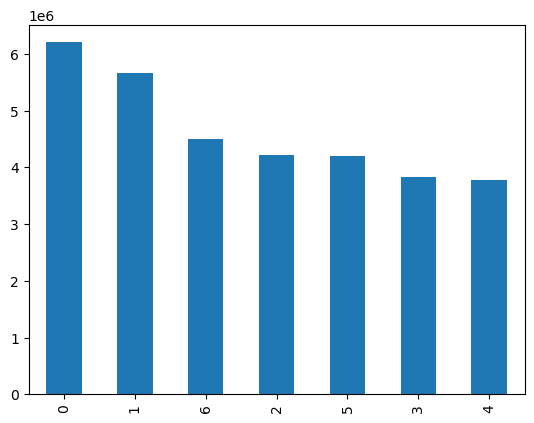

In [7]:
# Create a bar chart show the frequency of orders by the day of the week
df_ords_prods_customers['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

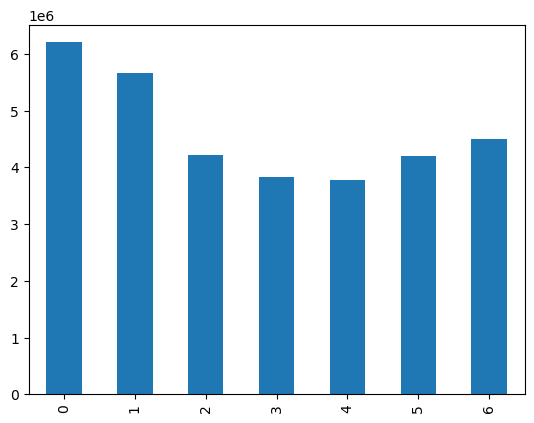

In [8]:
# Remove the sort from the obvservations
df_ords_prods_customers['orders_day_of_week'].value_counts().sort_index().plot.bar()

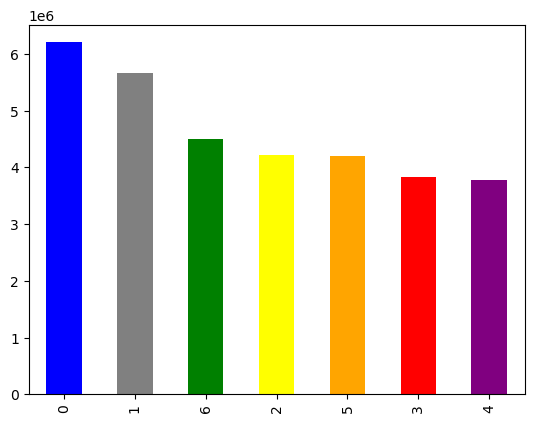

In [9]:
# Add colour to the bar chart
bar = df_ords_prods_customers['orders_day_of_week'].value_counts().plot.bar(color =['blue', 'grey', 'green', 'yellow', 'orange', 'red', 'purple'])

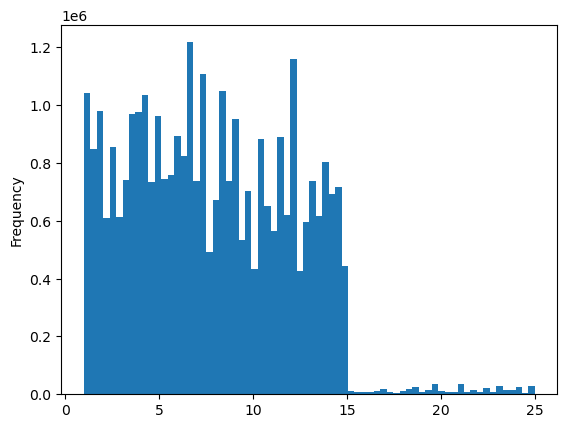

In [10]:
# Create a histogram of the 'prices' column
hist = df_ords_prods_customers['prices'].plot.hist(bins = 70)

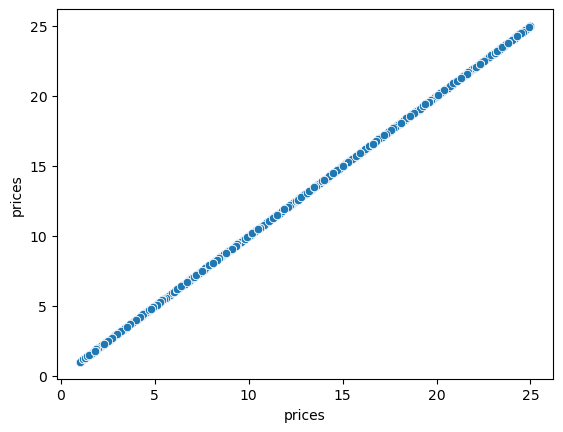

In [11]:
# Create a scatterplot of the 'prices' column
scatterplot = sns.scatterplot(x = 'prices', y = 'prices', data = df_ords_prods_customers)

In [12]:
# Create a line chart using a 70%/30% sample
np.random.seed(4)
# Create a new list - dev
dev = np.random.rand(len(df_ords_prods_customers)) <= 0.7

In [13]:
# Verify the list dev
dev

array([False,  True, False, ...,  True,  True,  True])

In [14]:
# Create two DataFrames for the 70% (big) and 30% (small) samples
big = df_ords_prods_customers[dev]
small = df_ords_prods_customers[~dev]

In [15]:
#Verify the big and small dataframes capture all the values of the samples
len(df_ords_prods_customers)

32404859

In [16]:
len(big) + len(small)

32404859

In [17]:
# Create a subset of the columns needed for the line chart ('prices' and 'orders_day_of_week')
df_sub = small[['orders_day_of_week', 'prices']]

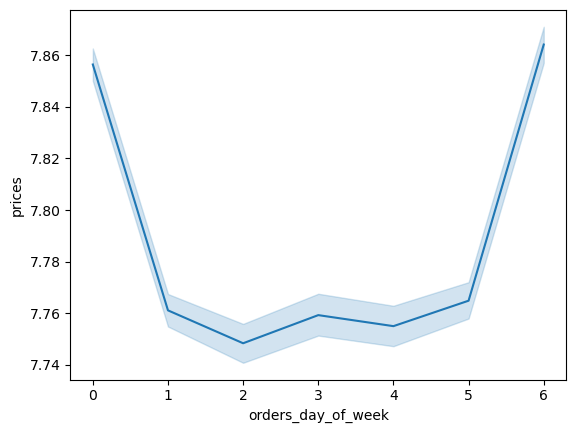

In [18]:
# Create line chart of 'prices' and 'orders_day_of_week' using the 30% sample
line = sns.lineplot(data = df_sub, x = 'orders_day_of_week', y = 'prices')

# 03. Task 4.9 Part 2 Step 3: You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

In [19]:
# Check consistency of 'order_hour_of_day' column
df_ords_prods_customers['order_hour_of_day'].describe()

count    3.240486e+07
mean     1.342515e+01
std      4.246380e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

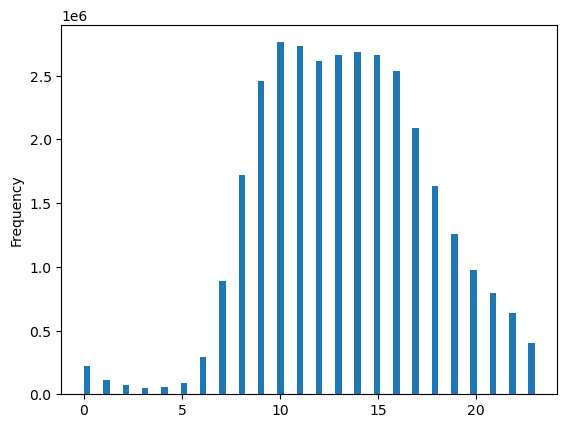

In [20]:
# Create a histogram of the 'order_hour_of_day' column
hist_hour_of_orders = df_ords_prods_customers['order_hour_of_day'].plot.hist(bins = 70)

## In a markdown cell beneath your histogram, describe what the histogram demonstrates.

__The histogram shows that the majority of orders take place between 9am and 17pm. The distribution is slightly shewed to the right.__

# 04. Task 4.9 Part 2 Step 4: The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

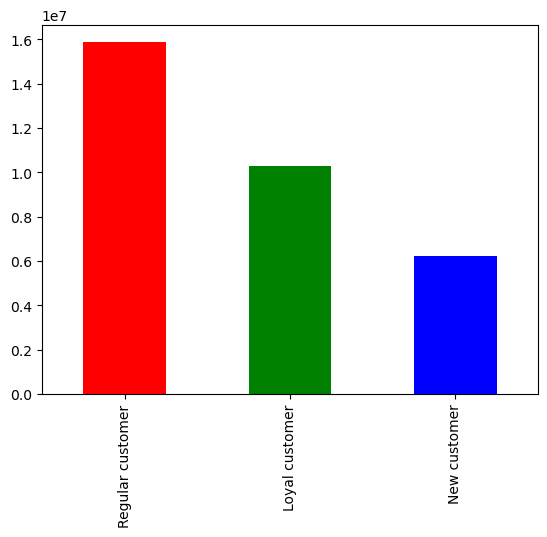

In [21]:
bar_loyalty = df_ords_prods_customers['loyalty_flag'].value_counts().plot.bar(color = ['red', 'green', 'blue'])

# 05. Task 4.9 Part 2 Step 5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [22]:
# Create a line chart using a 70%/30% sample to plot 'prices' against 'order_hour_of_day'
np.random.seed(4)
# Create a new list - dev_2
dev_2 = np.random.rand(len(df_ords_prods_customers)) <= 0.7

In [23]:
# Verify the list dev_2
dev_2

array([False,  True, False, ...,  True,  True,  True])

In [24]:
# Create two new df to store the 70% (big) and 30% (small) samples
big_2 = df_ords_prods_customers[dev_2]
small_2 = df_ords_prods_customers [~dev_2]

In [25]:
# Check the 2 new dfs have captured the samples
len(df_ords_prods_customers)

32404859

In [26]:
len(big_2) + len(small_2)

32404859

In [27]:
# Create the subset of the two variables 'prices' and 'order_hour_of_day'
df_sub_2 = small_2[['prices', 'order_hour_of_day']]

In [28]:
# Check subset
df_sub_2.head()

,prices,order_hour_of_day
0,5.8,11
2,20.0,13
3,20.0,14
6,4.4,13
10,12.8,9


In [29]:
df_sub_2.shape

(9721098, 2)

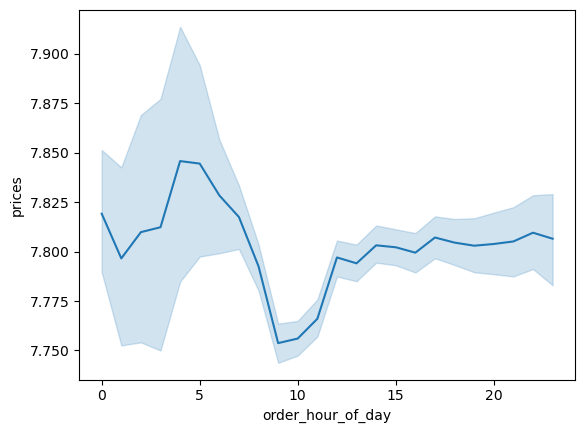

In [30]:
# Create line chart
line_price_by_hour = sns.lineplot(data = df_sub_2, x = 'order_hour_of_day', y = 'prices')

# 06. Task 4.9 Part 2 Step 6: Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [31]:
# Create line chart using a 70%/ 30% sample to plot 'age' against 'family_dependants'
np.random.seed(4)
# Create a new list, dev_3
dev_3 = np.random.rand(len(df_ords_prods_customers)) <= 0.7

In [32]:
# Check the list dev_3
dev_3

array([False,  True, False, ...,  True,  True,  True])

In [33]:
# Create two new dataframes
big_3 = df_ords_prods_customers[dev_3]
small_3 = df_ords_prods_customers[~dev_3]

In [34]:
# Check the dataframes correctly captured the sample
len(df_ords_prods_customers)

32404859

In [35]:
len(big_3) + len(small_3)

32404859

In [36]:
# Create a subset for the two variables 'age' and 'family dependants'
df_sub_3 = small_3[['age', 'family_dependants']]

In [37]:
# Check the subset
df_sub_3.head()

,age,family_dependants
0,81,1
2,81,1
3,81,1
6,81,1
10,81,1


In [38]:
df_sub_3.shape

(9721098, 2)

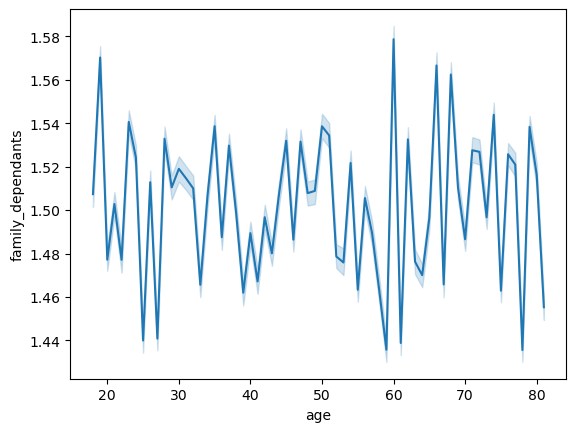

In [53]:
# Create the line chart
line_age_dependants = sns.lineplot(data = df_sub_3, x = 'age', y = 'family_dependants')

## In a markdown cell beneath your line chart, describe what the line chart shows

__The line chart shows no correlation between the age of a customer and the number of their family dependants but this might require further investigation__ 

# 07. Task 4.9 Part 2 Step 7: You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In [40]:
# Create a subset to use for a scatterplot using the ‘age’ and ‘income’ variables
df_sub_4 = small[['age', 'income']]

In [41]:
# Verify the new dataframe
df_sub_4.head()

,age,income
0,81,49620
2,81,49620
3,81,49620
6,81,49620
10,81,49620


In [42]:
df_sub_4.shape

(9721098, 2)

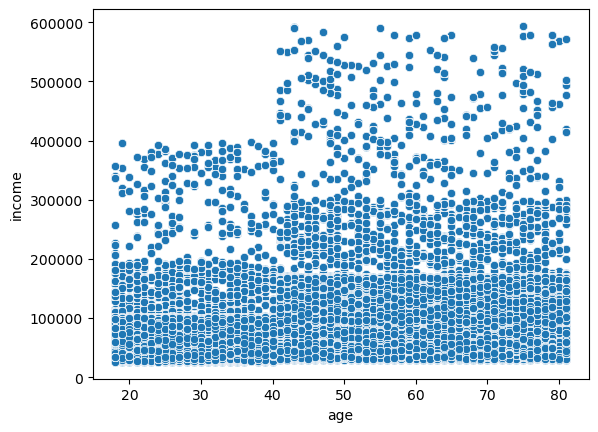

In [43]:
# Create a scatterplot to look at any relationship between age and income of the customers using df_sub_4
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_sub_4)

## In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

__The scatterplot indicates that there might be a positive correlation between age and income. Customers over 40 years share the highest income ranges.__

# 08. Task 4.9 Part 2 Step 8: Export your visualizations as “.png” files in your relevant project folder

In [56]:
# Export all charts created as .png files
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [46]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [47]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_prices.png'))

In [48]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow.png'))

In [49]:
hist_hour_of_orders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histhour_of_orders.png'))

In [50]:
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

In [51]:
line_price_by_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_by_hour.png'))

In [54]:
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

In [55]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))